# Exploratory Data Analysis of Company Data

## Dataset Overview

The dataset used in this analysis consists of various tables, each providing critical information about companies, their investments, acquisitions, employee profiles, and more. Below is a summary of the key columns across the different tables, which we explored to extract meaningful insights about the business landscape.

### **1. Company Data**

- **`Company_Name`**: Represents the name of each company in the dataset.
- **`Category`**: Describes the sectors or industries in which the company operates. Each company can belong to multiple categories.
- **`Location`**: Provides the geographical location of the company, including city, state, and country.
- **`Founded_On`**: The founding date of the company, used to determine company age.
- **`Revenue_Range`** and **`Employee_Number`**: Represent the revenue bracket and number of employees, respectively, which are indicators of the company's size and growth stage.

### **2. Investment Data**

- **`Company_Name`**: The name of the company receiving an investment.
- **`Funding_Type`**: Indicates the type of funding (e.g., Seed, Series A, Private Equity).
- **`Announced_Date`**: The date on which the investment was announced, used to understand funding trends over time.
- **`Investment_Stage`**: Represents the stage of investment, helping to understand the company lifecycle (e.g., Early Stage, Late Stage).
- **`Money_Raised`**: The monetary amount of the investment, which provides insights into the scale of funding received by different companies.

### **3. Acquisition Data**

- **`Company_Name`**: The name of the company making the acquisition.
- **`Acquiree_Name`**: Represents the name of the acquired company.
- **`Announced_Date`**: The date when the acquisition was announced, used to study acquisition trends.
- **`Price`**: The amount paid for the acquisition, providing insights into acquisition strategies and valuations.
- **`Acquisition_Stage`**: The stage at which the acquisition took place, offering clues about market consolidation behaviors.

### **4. Employee Data**

- **`Employee_Md5`**: An anonymized identifier for each employee.
- **`Job_Titles`**: Describes the job roles of employees (e.g., CEO, Software Engineer), which allows us to analyze the types of talent employed by the companies.
- **`Company_Name`**: Indicates the company each employee works for, helping us understand which companies have the largest workforces.
- **`Attended_Schools`**: Lists the educational institutions attended by employees, providing insights into the academic backgrounds common among the workforce in different industries.

This overview sets the foundation for a comprehensive exploratory data analysis, aiming to uncover key business insights that can help investors, entrepreneurs, and stakeholders make informed decisions.


## Objectives
The goal of this analysis is to explore and understand trends in the dataset related to various company metrics, including:
- **Company Growth and Age Analysis**: To analyze company age distribution, employee counts, and relationships between company growth metrics.
- **Category-Based Insights**: To uncover which industries have the highest number of companies, employee counts, and revenue distributions.
- **Investment Trends**: To explore funding types and investment stages across industries and time.
- **Acquisition Patterns**: To determine which companies are most active in acquiring others and in which sectors.



In [1]:
!pip install pandas

You should consider upgrading via the 'C:\Users\91873\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [3]:
company_df = pd.read_csv('/Users/91873/milestone_prj/daft04-3-milestone-project-Namy7/company.csv', delimiter=',', encoding='ISO-8859-1')
investment_df = pd.read_csv('/Users/91873/milestone_prj/daft04-3-milestone-project-Namy7/investment.csv', delimiter=',', encoding='ISO-8859-1')
acquisition_df = pd.read_csv('/Users/91873/milestone_prj/daft04-3-milestone-project-Namy7/Acquisition.csv', delimiter=',', encoding='ISO-8859-1')
employee_df = pd.read_csv('/Users/91873/milestone_prj/daft04-3-milestone-project-Namy7/Employee.csv', delimiter=',', encoding='ISO-8859-1')

In [5]:
company_df.rename(
    columns = {
        "COMPANY_NAME": "Company_Name",
        "CATEGORY": "Category",
        "LOCATION": "Location",
        "FOUNDED_ON": "Founded_On",
        "EXITED_ON": "Exited_On",
        "CLOSED_ON": "Closed_On",
        "REVENU_RANGE": "Revenue_Range",
        "EMPLOYEE_NUMBER": "Employee_Num"
    },
    inplace=True
)
company_df.head()


,Company_Name,Category,Location,Founded_On,Exited_On,Closed_On,Revenue_Range,Employee_Num
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,,,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,,,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,,,$1M to $10M,1-10


In [6]:
print(f"Shape of data: {company_df.shape}")
company_df.dropna(
    how="all",
    inplace=True
)

Shape of data: (1000, 8)


In [7]:
print(f"Shape of data: {company_df.shape}")
company_df.drop_duplicates(inplace=True)

Shape of data: (1000, 8)


In [8]:
company_df.reset_index(drop=True, inplace=True)
company_df

,Company_Name,Category,Location,Founded_On,Exited_On,Closed_On,Revenue_Range,Employee_Num
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,,,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,,,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,,,$1M to $10M,1-10
...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia","Sep 17, 2018",,,$1M to $10M,11-50
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States","Jun 1, 2009",,,$50M to $100M,251-500
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",2019,,,Less than $1M,1-10
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States","Jul 31, 1998","Jan 13, 1978",,$10B+,10001+


In [107]:
# Function to extract year while handling cases with only year vs full dates
def extract_year(column):
    # Convert full dates to datetime and extract the year, coercing errors to NaT
    dates = pd.to_datetime(column, errors='coerce')
    # If conversion fails (NaT), try extracting the year directly if it's a valid 4-digit number
    years = dates.dt.year.fillna(column.where(column.str.match(r'^\d{4}$')).astype(float))
    return years

# the function to each date column
#company_df['Founded_Year'] = extract_year(company_df['Founded_On'])
#company_df['Exited_Year'] = extract_year(company_df['Exited_On'])
#company_df['Closed_Year'] = extract_year(company_df['Closed_On'])

#Drop the original date columns
#company_df.drop(['Founded_On', 'Exited_On', 'Closed_On'], axis=1, inplace=True)
company_df

,Company_Name,Category,Location,Revenue_Range,Employee_Num,Founded_Year,Exited_Year,Closed_Year,city,state,country,Simplified_Category,Company_Age
0,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",1M to 10M,51-100,2016,NaN,NaN,New York,New York,United States,FinTech,8
1,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",10B+,10001+,2010,2018,NaN,Beijing,Beijing,China,Internet,14
2,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",1M to 10M,1-10,2018,NaN,NaN,Brooklyn,New York,United States,E-Commerce,6
3,Apple,"Consumer Electronics, Electronics, Hardware, M...","Cupertino, California, United States",10B+,10001+,1976,1980,NaN,Cupertino,California,United States,Software,48
4,OurCrowd,"Angel Investment, Crowdfunding, FinTech, Fundi...","Jerusalem, Yerushalayim, Israel",50M to 100M,101-250,2013,NaN,NaN,Jerusalem,Yerushalayim,Israel,FinTech,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Cornershop,"E-Commerce, Internet, Mobile","Las Condes, Region Metropolitana, Chile",50M to 100M,101-250,2015,2019,NaN,Las Condes,Region Metropolitana,Chile,E-Commerce,9
670,Privitar,"Big Data, Cyber Security, Enterprise Software,...","London, England, United Kingdom",1M to 10M,101-250,2014,NaN,NaN,London,England,United Kingdom,Enterprise Software,10
671,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",1M to 10M,11-50,2018,NaN,NaN,Bogotá,Distrito Especial,Colombia,Finance,6
672,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States",50M to 100M,251-500,2009,NaN,NaN,Portland,Oregon,United States,Information Technology,15


In [134]:
company_df['Revenue_Range'] = company_df['Revenue_Range'].str.replace('[\$,]', '', regex=True)
company_df['Employee_Num'] = company_df['Employee_Num'].str.replace('[\$,]', '', regex=True)
company_df

,Company_Name,Category,Location,Revenue_Range,Employee_Num,Founded_Year,Exited_Year,Closed_Year,city,state,country,Simplified_Category,Company_Age
0,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",1M to 10M,51-100,2016,NaN,NaN,New York,New York,United States,FinTech,8
1,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",10B+,10001+,2010,2018,NaN,Beijing,Beijing,China,Internet,14
2,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",1M to 10M,1-10,2018,NaN,NaN,Brooklyn,New York,United States,E-Commerce,6
3,Apple,"Consumer Electronics, Electronics, Hardware, M...","Cupertino, California, United States",10B+,10001+,1976,1980,NaN,Cupertino,California,United States,Software,48
4,OurCrowd,"Angel Investment, Crowdfunding, FinTech, Fundi...","Jerusalem, Yerushalayim, Israel",50M to 100M,101-250,2013,NaN,NaN,Jerusalem,Yerushalayim,Israel,FinTech,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Cornershop,"E-Commerce, Internet, Mobile","Las Condes, Region Metropolitana, Chile",50M to 100M,101-250,2015,2019,NaN,Las Condes,Region Metropolitana,Chile,E-Commerce,9
670,Privitar,"Big Data, Cyber Security, Enterprise Software,...","London, England, United Kingdom",1M to 10M,101-250,2014,NaN,NaN,London,England,United Kingdom,Enterprise Software,10
671,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",1M to 10M,11-50,2018,NaN,NaN,Bogotá,Distrito Especial,Colombia,Finance,6
672,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States",50M to 100M,251-500,2009,NaN,NaN,Portland,Oregon,United States,Information Technology,15


In [12]:
#each category counts
categories_exploded = company_df['Category'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

categories_exploded = categories_exploded.str.strip()
category_counts = categories_exploded.value_counts()
category_counts

Software                                          309
FinTech                                           151
Financial Services                                150
SaaS                                              149
Information Technology                            145
                                                 ... 
Precious Metals                                     1
3D Printing                                         1
Commercial Insurance                                1
Social Entrepreneurship                             1
Application Specific Integrated Circuit (ASIC)      1
Name: count, Length: 484, dtype: int64

In [130]:
# Count the occurrences of each category after splitting
categories_exploded = company_df['Category'].str.split(',').explode().str.strip()
top_10_categories = categories_exploded.value_counts().head(10).index

# Display the top 10 categories

def simplify_category(row):
    # Split categories, strip whitespace, and take the first category that matches the top 10 list
    categories = [cat.strip() for cat in row.split(',')]
    for category in categories:
        if category in top_10_categories:
            return category
    return np.nan  # If no match is found, return NaN

# Apply the function to simplify the Category column
company_df['Simplified_Category'] = company_df['Category'].apply(simplify_category)

# Drop rows with NaN in Simplified_Category
top_10_df = company_df.dropna(subset=['Simplified_Category'])

# Display the cleaned DataFrame
top_10_df.head()

,Company_Name,Category,Location,Revenue_Range,Employee_Num,Founded_Year,Exited_Year,Closed_Year,city,state,country,Simplified_Category,Company_Age
0,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",1M to 10M,51-100,2016,NaN,NaN,New York,New York,United States,FinTech,8
1,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",10B+,10001+,2010,2018,NaN,Beijing,Beijing,China,Internet,14
2,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",1M to 10M,1-10,2018,NaN,NaN,Brooklyn,New York,United States,E-Commerce,6
3,Apple,"Consumer Electronics, Electronics, Hardware, M...","Cupertino, California, United States",10B+,10001+,1976,1980,NaN,Cupertino,California,United States,Software,48
4,OurCrowd,"Angel Investment, Crowdfunding, FinTech, Fundi...","Jerusalem, Yerushalayim, Israel",50M to 100M,101-250,2013,NaN,NaN,Jerusalem,Yerushalayim,Israel,FinTech,11


In [111]:
company_df["Simplified_Category"].value_counts()

Simplified_Category
E-Commerce                107
Enterprise Software       105
Finance                    83
Health Care                74
Information Technology     70
Software                   62
Financial Services         56
Internet                   52
SaaS                       50
FinTech                    15
Name: count, dtype: int64

In [14]:
# Regular expression pattern to extract city, state, and country
pattern = r'([^,]+)(?:,\s*([^,]+))?(?:,\s*([^,]+))?$'

# Extract the components into new columns
company_df[['city', 'state', 'country']] = company_df['Location'].str.extract(pattern)
company_df

,Company_Name,Category,Location,Revenue_Range,Employee_Num,Founded_Year,Exited_Year,Closed_Year,city,state,country
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States",1B to 10B,1001-5000,2006.0,2013.0,NaN,San Francisco,California,United States
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",100M to 500M,5001-10000,NaN,NaN,NaN,Hangzhou,Zhejiang,China
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",1M to 10M,51-100,2016.0,NaN,NaN,New York,New York,United States
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",10B+,10001+,2010.0,2018.0,NaN,Beijing,Beijing,China
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",1M to 10M,1-10,2018.0,NaN,NaN,Brooklyn,New York,United States
...,...,...,...,...,...,...,...,...,...,...,...
995,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",1M to 10M,11-50,2018.0,NaN,NaN,Bogotá,Distrito Especial,Colombia
996,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States",50M to 100M,251-500,2009.0,NaN,NaN,Portland,Oregon,United States
997,Jupiter,"Delivery, Logistics","San Francisco, California, United States",Less than 1M,1-10,2019.0,NaN,NaN,San Francisco,California,United States
998,Bank of America,"Asset Management, Banking, Finance, Financial ...","Charlotte, North Carolina, United States",10B+,10001+,1998.0,1978.0,NaN,Charlotte,North Carolina,United States


In [60]:
company_df.dropna(
    subset = ["Simplified_Category", "Revenue_Range"],
    how="all",
    inplace=True
)

In [61]:
company_df.reset_index(drop=True, inplace=True)
company_df

,Company_Name,Category,Location,Revenue_Range,Employee_Num,Founded_Year,Exited_Year,Closed_Year,city,state,country,Simplified_Category,Company_Age
0,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",1M to 10M,51-100,2016,NaN,NaN,New York,New York,United States,FinTech,8
1,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",10B+,10001+,2010,2018,NaN,Beijing,Beijing,China,Internet,14
2,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",1M to 10M,1-10,2018,NaN,NaN,Brooklyn,New York,United States,E-Commerce,6
3,Apple,"Consumer Electronics, Electronics, Hardware, M...","Cupertino, California, United States",10B+,10001+,1976,1980,NaN,Cupertino,California,United States,Software,48
4,OurCrowd,"Angel Investment, Crowdfunding, FinTech, Fundi...","Jerusalem, Yerushalayim, Israel",50M to 100M,101-250,2013,NaN,NaN,Jerusalem,Yerushalayim,Israel,FinTech,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Cornershop,"E-Commerce, Internet, Mobile","Las Condes, Region Metropolitana, Chile",50M to 100M,101-250,2015,2019,NaN,Las Condes,Region Metropolitana,Chile,E-Commerce,9
670,Privitar,"Big Data, Cyber Security, Enterprise Software,...","London, England, United Kingdom",1M to 10M,101-250,2014,NaN,NaN,London,England,United Kingdom,Enterprise Software,10
671,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",1M to 10M,11-50,2018,NaN,NaN,Bogotá,Distrito Especial,Colombia,Finance,6
672,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States",50M to 100M,251-500,2009,NaN,NaN,Portland,Oregon,United States,Information Technology,15


## Calculate Company Age

To better understand the **lifecycle of each company**, I need to calculate the age of each company based on the year they were founded. The company age helps us identify trends related to longevity, such as:

- **Survival Analysis**: Determine how long companies have been operating, which is key in understanding industry stability.
- **Comparison by Category**: Compare the ages of companies across different categories to understand which sectors have more mature players versus emerging startups.

The code below calculates the **Company Age** by subtracting the year of founding from the **current year**. I also clean the dataset to ensure there are no missing values in the age column.


In [128]:
# Step 1: Calculate Company Age
current_year = datetime.now().year
company_df['Company_Age'] = current_year - company_df['Founded_Year']
company_df.dropna(
    subset = ["Company_Age"],
    how="all",
    inplace=True
)
company_df.reset_index(drop=True, inplace=True)
company_df

,Company_Name,Category,Location,Revenue_Range,Employee_Num,Founded_Year,Exited_Year,Closed_Year,city,state,country,Simplified_Category,Company_Age
0,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",1M to 10M,51-100,2016,NaN,NaN,New York,New York,United States,FinTech,8
1,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",10B+,10001+,2010,2018,NaN,Beijing,Beijing,China,Internet,14
2,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",1M to 10M,1-10,2018,NaN,NaN,Brooklyn,New York,United States,E-Commerce,6
3,Apple,"Consumer Electronics, Electronics, Hardware, M...","Cupertino, California, United States",10B+,10001+,1976,1980,NaN,Cupertino,California,United States,Software,48
4,OurCrowd,"Angel Investment, Crowdfunding, FinTech, Fundi...","Jerusalem, Yerushalayim, Israel",50M to 100M,101-250,2013,NaN,NaN,Jerusalem,Yerushalayim,Israel,FinTech,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,Cornershop,"E-Commerce, Internet, Mobile","Las Condes, Region Metropolitana, Chile",50M to 100M,101-250,2015,2019,NaN,Las Condes,Region Metropolitana,Chile,E-Commerce,9
670,Privitar,"Big Data, Cyber Security, Enterprise Software,...","London, England, United Kingdom",1M to 10M,101-250,2014,NaN,NaN,London,England,United Kingdom,Enterprise Software,10
671,Valiu,"Cryptocurrency, Finance, Financial Services, F...","Bogotá, Distrito Especial, Colombia",1M to 10M,11-50,2018,NaN,NaN,Bogotá,Distrito Especial,Colombia,Finance,6
672,Airship,"Analytics, Information Technology, Messaging, ...","Portland, Oregon, United States",50M to 100M,251-500,2009,NaN,NaN,Portland,Oregon,United States,Information Technology,15


## Average Company Age by Category

In this analysis, I'm interested in understanding the **average age of companies** within different categories. This helps us gauge which sectors are more **mature** (i.e., older, established industries) and which are **relatively new** (emerging industries).

Below is a bar plot showing the **average company age** across the **top categories**.


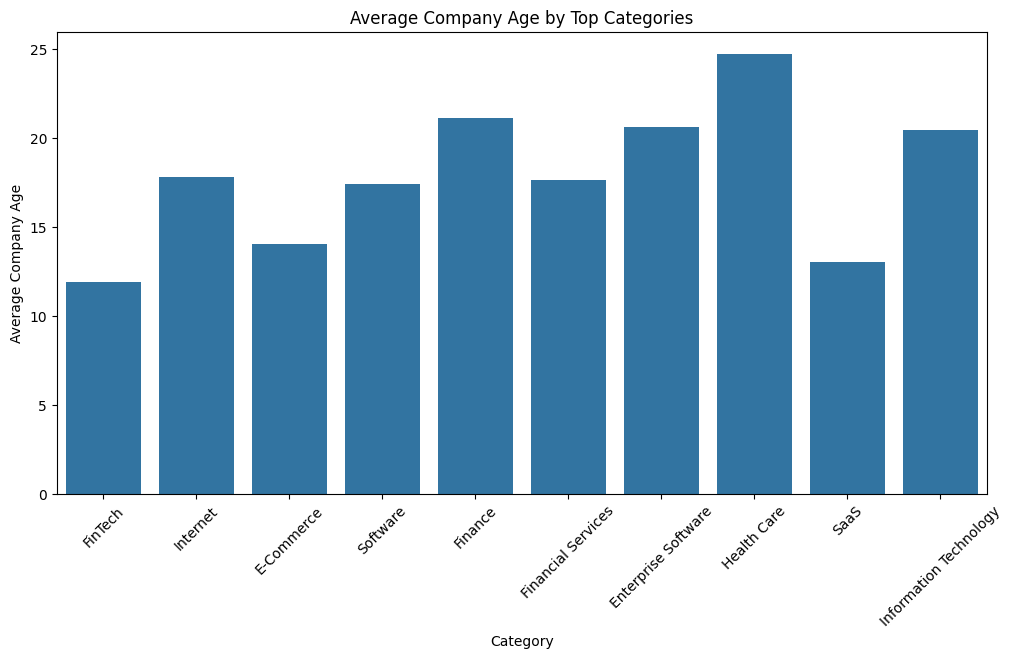

In [131]:
#a bar plot to show average company age by category
plt.figure(figsize=(12, 6))
sns.barplot(data=company_df, x='Simplified_Category', y='Company_Age', errorbar=None)
plt.title('Average Company Age by Top Categories')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Company Age')
plt.show()

### Key Insights:

- **Health Care** and **Finance** sectors have the **highest average company age** compared to others, indicating that these sectors are mature, well-established, and have been in existence for a long time.
- **Internet**, **Enterprise Software**, and **Financial Services** also show relatively high average ages, suggesting they have experienced consistent growth and stability over time.
- **FinTech** and **SaaS** companies are relatively **younger** compared to others, reflecting their emergence over the past decade due to technological advancements and increased interest in digital solutions.
- The **SaaS** and **E-Commerce** sectors, which are known for rapid growth, have a younger average company age. This aligns with recent trends, where many startups have emerged within these areas over the past 10-15 years.

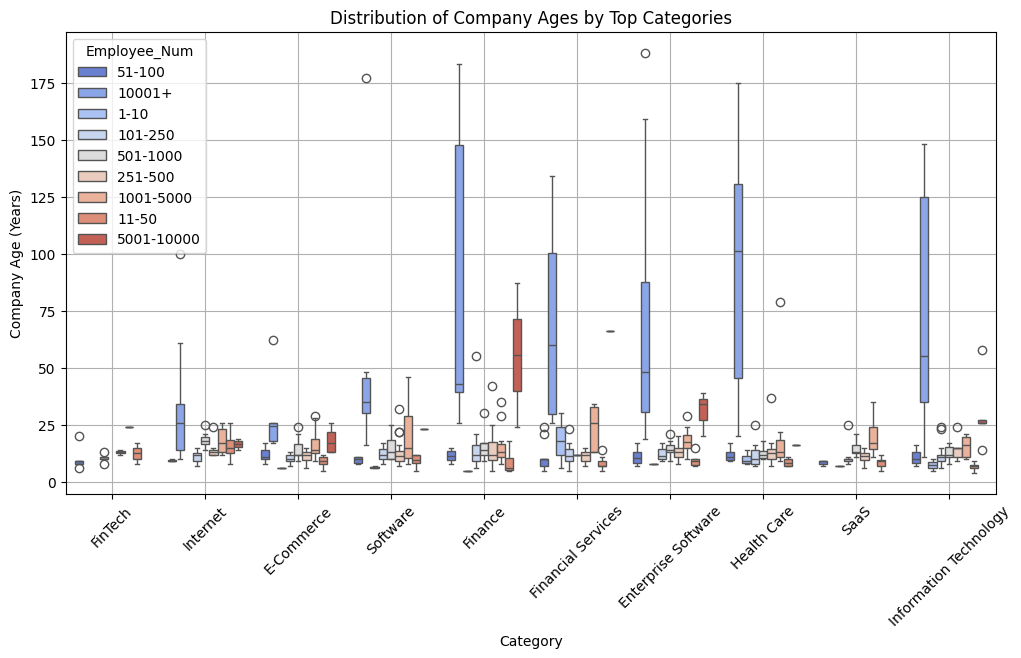

In [93]:
# Plot the distribution of company ages for the top 10 categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=company_df, x='Simplified_Category', y='Company_Age', hue='Employee_Num', palette='coolwarm')
plt.title('Distribution of Company Ages by Top Categories')
plt.xlabel('Category')
plt.ylabel('Company Age (Years)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Key Insights:

- **Employee Growth Over Time**: In general, **older companies** tend to have **higher employee counts**, indicating that companies grow and expand their workforce as they mature.
- **Category Differences**: There are noticeable differences across categories:
  - **Health Care** and **Finance** companies tend to have a wider range of employee numbers, regardless of their age, showing diverse growth patterns in these sectors.
  - **SaaS** and **FinTech** companies are relatively **younger** with fewer employees, reflecting the trend of recent startups emerging in these high-growth technology sectors.
  - **Enterprise Software** companies, despite being relatively young, show considerable employee growth, suggesting rapid scaling within the industry.
- **Young, High Employee Count Outliers**: Some relatively young companies already have high employee numbers, which could indicate successful scaling or large-scale market entry, especially in categories like **E-Commerce** or **Enterprise Software**.


## Distribution of Companies by Employee Number

Understanding the distribution of companies based on the **number of employees** gives us an idea of company size across different industries. This information can be used to:

- Identify the **scale** of companies (small, medium, or large).
- Understand the **workforce landscape**, such as how many companies are major employers compared to those with a small number of employees.
- Examine the typical company size within the dataset.

Below, we have a pie chart that visualizes the **distribution of companies by employee count**.


## Distribution of Companies by Revenue Range

The **revenue range** of companies can give insights into their **financial health and market impact**. Companies with higher revenues are typically more established and financially secure, while those with lower revenues might represent startups or companies in their early growth stages.

Analyzing the revenue range helps:

- Determine the **financial diversity** of companies in the dataset.
- Understand the concentration of **high-revenue** versus **low-revenue** companies.
- Gain insights into which revenue brackets are the most common among the companies.

Below is a pie chart showing the **distribution of companies based on their revenue range**.


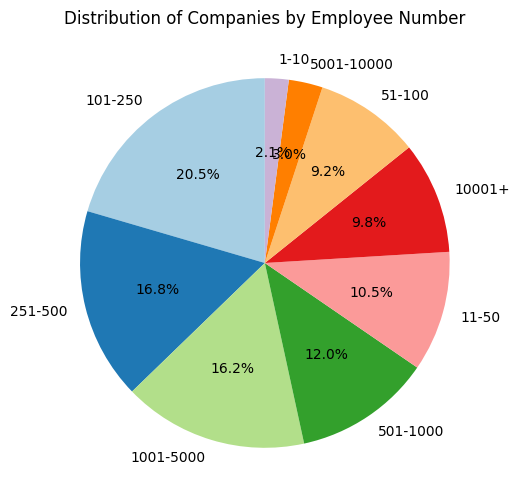

C:\Users\91873\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


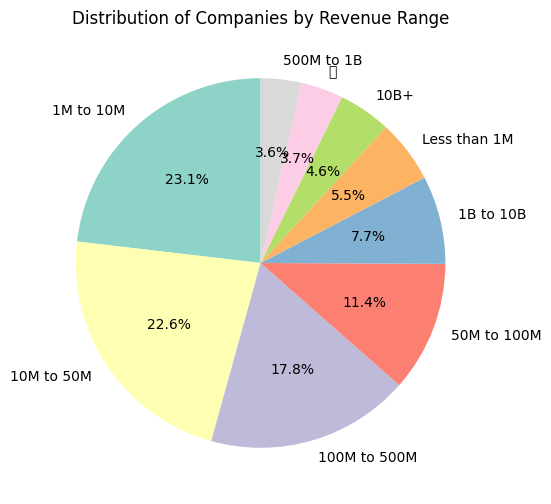

In [74]:
# Pie chart for Employee Number distribution
plt.figure(figsize=(8, 6))
employee_counts = company_df['Employee_Num'].value_counts()
plt.pie(employee_counts, labels=employee_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Companies by Employee Number')
plt.show()

# Pie chart for Revenue Range distribution
plt.figure(figsize=(8, 6))
revenue_counts = company_df['Revenue_Range'].value_counts()
plt.pie(revenue_counts, labels=revenue_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Companies by Revenue Range')
plt.show()

### Key Insights:

- The largest proportion of companies fall into the **101-250 employee range** (20.5%), indicating a predominance of medium-sized firms.
- Companies with **1-10** employees represent a small fraction (2.1%), suggesting that startups or very small companies are relatively rare in this dataset.
- A significant number of companies also fall within the **251-500** and **501-1000** employee ranges, indicating that there is a healthy representation of medium to large-sized companies.
- The **10001+ employee** segment accounts for around **9.8%**, indicating that a notable number of large corporations are present, albeit fewer compared to mid-sized firms.

This distribution helps identify whether the dataset is dominated by smaller startups or larger corporations, providing insight into the **scale and maturity** of the companies represented.

### Key Insights:

- The **1M to 10M** and **10M to 50M** revenue ranges make up the largest portions of the dataset, accounting for **23.1%** and **22.6%** of companies, respectively. This suggests that a majority of companies are generating moderate revenues.
- About **17.8%** of companies fall into the **100M to 500M** revenue bracket, indicating a sizable group of established firms generating substantial revenue.
- Only **3.6%** of companies have revenues between **500M to 1B**, and **4.6%** generate **10B+**, highlighting that a smaller portion of companies are true market leaders in terms of revenue generation.
- The **"Less than 1M"** category makes up **5.5%** of companies, suggesting that only a few companies are in the very early stages of revenue growth.

This distribution provides insights into the **financial landscape** of the dataset, revealing that the majority of companies are in their growth phase, with fewer companies reaching the highest levels of revenue.



In [137]:
#top 10 Categories by Company Count
#plt.figure(figsize=(12, 6))
#sns.countplot(data=top_10_df, y='Simplified_Category', order=top_10_categories, palette='viridis')
#plt.title('Top 10 Categories by Company Count')
#plt.xlabel('Number of Companies')
#plt.ylabel('Category')
#plt.show()

In [138]:
# Scatter plot to visualize relationship
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=company_df, x='Company_Age', y='Employee_Num', hue='Simplified_Category', palette='coolwarm', alpha=0.7)
#plt.title('Company Age vs Employee Count for Top Categories')
#plt.xlabel('Company Age (Years)')
#plt.ylabel('Employee Count')
#plt.legend(title='Category', bbox_to_anchor=(1, 1))
#plt.show()

## Geographical and Market Influence Analysis

To understand how different **business categories** are represented across different **countries**, we conducted a **geographical analysis** of the top company categories by their presence in the top countries. This analysis allows us to:

- Determine **which countries** dominate in certain categories.
- Understand **geographical market influence**, which highlights the global distribution of companies in each sector.
- Identify which industries are most prominent in different countries, offering insights into **regional specializations**.

The heatmap below provides a visualization of the **distribution of companies by category across the top 10 countries**. The intensity of the color indicates the number of companies in each category-country combination.

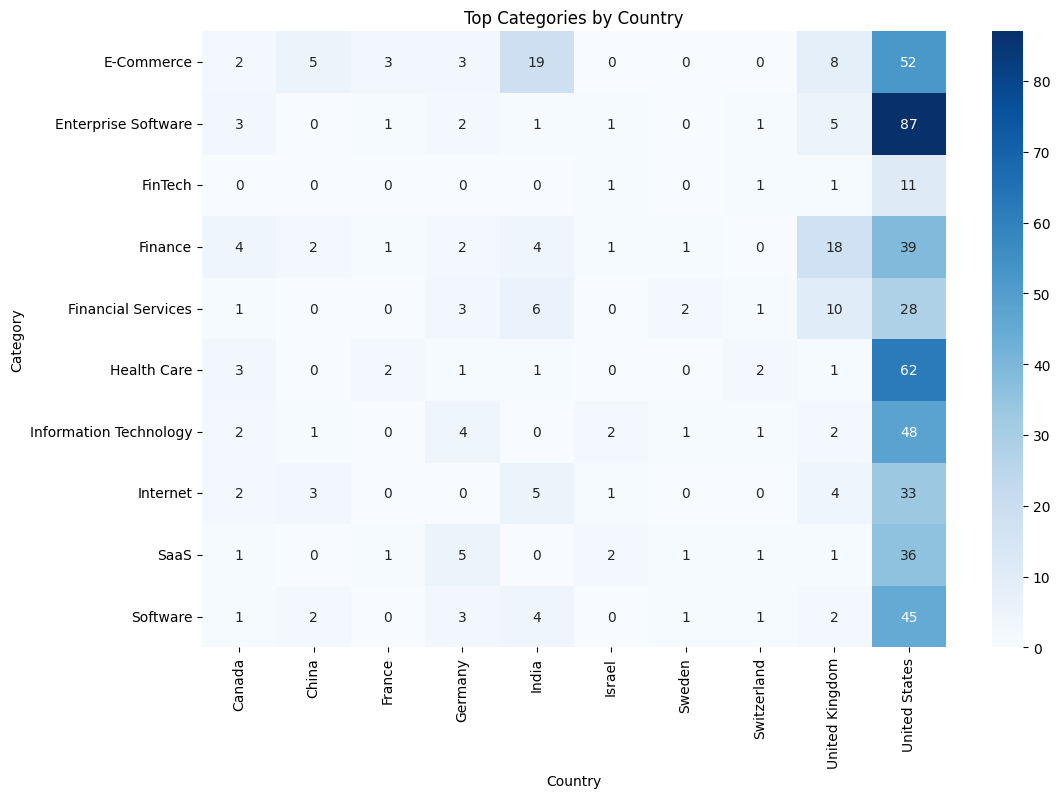

In [85]:
#Geographical and Market Influence
# Filter data for top categories and countries
top_locations_df = company_df.groupby(['country', 'Simplified_Category']).size().reset_index(name='Company_Count')
top_countries = top_locations_df['country'].value_counts().head(10).index
filtered_locations_df = top_locations_df[top_locations_df['country'].isin(top_countries)]

#Pivot table for the heatmap
pivot_table = filtered_locations_df.pivot(index='Simplified_Category', columns='country', values='Company_Count').fillna(0)

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True)
plt.title('Top Categories by Country')
plt.xlabel('Country')
plt.ylabel('Category')
plt.show()

### Key Insights:

- **United States** is the clear leader across most categories, with the highest number of companies in sectors such as **E-Commerce**, **Enterprise Software**, and **Health Care**. This suggests that the U.S. has a diverse and thriving business ecosystem across multiple industries.
- **India** shows significant representation in the **Internet** and **Enterprise Software** categories, indicating a strong tech and software-driven market presence.
- **United Kingdom** has a notable presence in **Financial Services**, which aligns with its historical significance as a global financial hub.
- **Germany** and **France** also exhibit representation across various categories, with a particular focus on **Health Care** and **Financial Services**, suggesting strong market growth and innovation in these areas.
- **Canada** and **China** are well-represented in **E-Commerce** and **FinTech**, indicating strong regional interest and investment in these growing sectors.


## Investment Trends by Year

Investment trends are a key indicator of economic growth, market confidence, and investor behavior. In this section, we will analyze how **total investment**  has evolved over time. We will identify peaks and valleys in the investment landscape and correlate them with market trends.


In [28]:
investment_df

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed
...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",
5934,Wipro Technologies,Post-IPO Equity,,"Oct 1, 2006",
5935,Wipro Technologies,Post-IPO Equity,,"Sep 1, 2007",


In [29]:
investment_df.rename(
    columns = {
        "COMPANY_NAME": "Company_Name",
        "FUNDING_TYPE": "Funding_Type",
        "MONEY_RAISED": "Money_Raised",
        "ANNOUNCED_DATE": "Announced_Date",
        "INVESTMENT_STAGE": "Investment_Stage"
    },
    inplace=True
)
investment_df.head()

,Company_Name,Funding_Type,Money_Raised,Announced_Date,Investment_Stage
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed


In [31]:
print(f"Shape of data: {investment_df.shape}")
investment_df.dropna(
    how="all",
    inplace=True
)

print(f"Shape of data: {investment_df.shape}")
investment_df.drop_duplicates(inplace=True)

investment_df.reset_index(drop=True, inplace=True)
investment_df

Shape of data: (4770, 5)
Shape of data: (4770, 5)


,Company_Name,Funding_Type,Money_Raised,Announced_Date,Investment_Stage
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed
...,...,...,...,...,...
4765,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",
4766,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",
4767,Wipro Technologies,Post-IPO Equity,,"Oct 1, 2006",
4768,Wipro Technologies,Post-IPO Equity,,"Sep 1, 2007",


In [32]:
# Convert ANNOUNCED_DATE to datetime and extract year
investment_df['Announced_Date'] = pd.to_datetime(investment_df['Announced_Date'], errors='coerce')
investment_df['Year'] = investment_df['Announced_Date'].dt.year

investment_df['Money_Raised'] = investment_df['Money_Raised'].str.replace('[\$,]', '', regex=True)

investment_df

,Company_Name,Funding_Type,Money_Raised,Announced_Date,Investment_Stage,Year
0,Pipe,Venture - Series Unknown,250000000,2021-03-31,,2021
1,Pipe,Series A,50000000,2021-03-09,Early Stage Venture,2021
2,Pipe,Seed,6000000,2020-02-25,Seed,2020
3,Pipe,Seed,10000000,2020-06-24,Seed,2020
4,Epic Games,Seed,1000000000,2021-04-13,Seed,2021
...,...,...,...,...,...,...
4765,PTC,Post-IPO Equity,1000000000,2018-06-11,,2018
4766,Berkshire Hathaway,Post-IPO Equity,3510000,2019-08-15,,2019
4767,Wipro Technologies,Post-IPO Equity,,2006-10-01,,2006
4768,Wipro Technologies,Post-IPO Equity,,2007-09-01,,2007


In [34]:
#Replace "-" with NaN in specific columns
columns_to_clean = ['Money_Raised', 'Investment_Stage']  # Replace with your actual column names
investment_df[columns_to_clean] = investment_df[columns_to_clean].replace("", np.nan)

#Drop rows with NaN in the specified columns
investment_df.dropna(subset=columns_to_clean, inplace=True)
investment_df.reset_index(drop=True, inplace=True)
investment_df

,Company_Name,Funding_Type,Money_Raised,Announced_Date,Investment_Stage,Year
0,Pipe,Series A,50000000,2021-03-09,Early Stage Venture,2021
1,Pipe,Seed,6000000,2020-02-25,Seed,2020
2,Pipe,Seed,10000000,2020-06-24,Seed,2020
3,Epic Games,Seed,1000000000,2021-04-13,Seed,2021
4,Brex,Series D,425000000,2021-04-26,Late Stage Venture,2021
...,...,...,...,...,...,...
2927,Amperity,Series C,50000000,2019-07-15,Late Stage Venture,2019
2928,Medium,Series A,25000000,2014-01-28,Early Stage Venture,2014
2929,Medium,Series B,57000000,2015-09-29,Early Stage Venture,2015
2930,Medium,Series C,50000000,2016-04-21,Late Stage Venture,2016


## Investment Trends Over the Years by Stage and Funding Type

Understanding how **investment trends** have changed over time across different **investment stages** and **funding types** is crucial for recognizing broader shifts in the funding landscape. This analysis helps answer questions like:

- **Which investment stages are most common in recent years?** This insight can help identify current preferences among investors.
- **How have funding types like Series A, Seed, and Private Equity evolved over time?** Such trends can inform which types of funding are most prevalent at each stage of the company's lifecycle.

The boxplot below depicts the **distribution of funding years** for various **investment stages**, with each stage further broken down by different **funding types**.


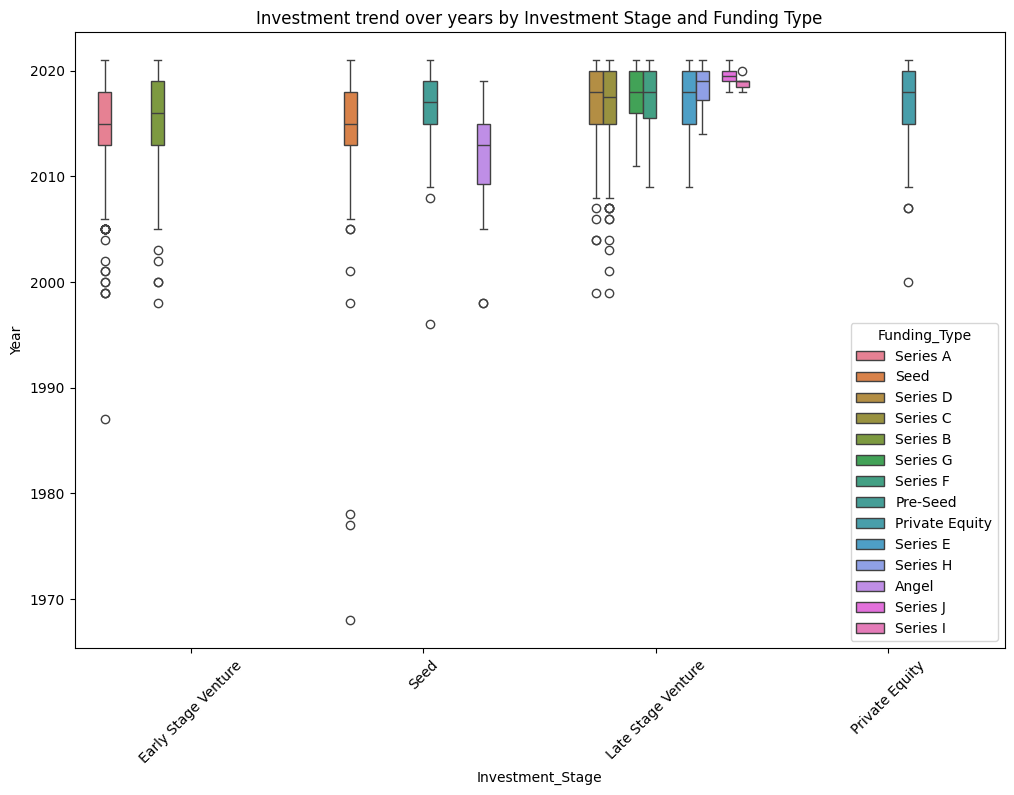

In [102]:
# Investment trend over years
plt.figure(figsize=(12, 8))
sns.boxplot(data=investment_df, x='Investment_Stage', y='Year', hue='Funding_Type')
plt.title('Investment trend over years by Investment Stage and Funding Type')
plt.xticks(rotation=45)
plt.show()


### Key Insights:

- **Recent Growth in Late-Stage Venture Funding**: Investment in **Late-Stage Venture** rounds has become more prevalent in recent years, as indicated by a concentration of more recent funding events between **2015 and 2020**. The funding types like **Series D, E, and G** are more concentrated in these late stages.
  
- **Seed and Early-Stage Investments**: **Seed** and **Early Stage Venture** investments are spread out over a longer period, showing consistent activity over time. These stages show wide dispersion, which suggests that these types of investments have been popular for several decades. However, the peak of such funding appears to be in the more recent years.

- **Series A and B Funding**: There is a distinct presence of **Series A and B** funding within **Early Stage Venture**, concentrated primarily in recent years, suggesting a growing trend in initial funding rounds, supporting startups' rapid early growth.

- **Private Equity Investment**: **Private Equity** investments show a steady increase, with a higher occurrence in the past decade. This is indicative of more companies attracting later-stage investments as they mature and require more significant capital for expansion.

- **Funding Over Time**: The **yearly spread** for different funding types indicates that some funding rounds, like **Seed** and **Early Series (A, B)**, are being awarded continuously, reflecting a stable interest in new ventures. Meanwhile, other rounds, such as **Series G, H**, and **Private Equity**, show higher concentrations recently, implying a maturing startup ecosystem needing more capital for growth and consolidation.


## Acquisition Dataset Overview

The **Acquisition Dataset** provides detailed information about company acquisitions, including the **acquirer**, the **acquiree**, the **price** of the acquisition, and the **stage** of acquisition. This dataset allows us to explore various dimensions of acquisitions, such as:

- **Acquisition Trends**: By analyzing **announced dates** and the **year** of acquisitions, we can identify **trends** in acquisition activities over time.
- **Price Analysis**: The **Price** column helps in understanding the financial dynamics involved in acquisitions, such as the average or median price paid in different stages of acquisition.
- **Acquisition Stages**: The **Acquisition Stage** gives insights into the type and purpose of acquisitions—whether it’s an early-stage acquisition to bolster technology or a mature-stage acquisition aimed at market expansion.
- **Market Leaders**: The **Company_Name** and **Acquiree_Name** provide valuable insights into which companies are **actively acquiring** others and which companies are **being acquired**, helping us understand **industry leaders** and **market consolidators**.

This dataset will be used to perform multiple analyses, such as identifying **trends over time**, understanding **Companies acquiring others most frequently** in different sectors, and discovering **which companies are making the most strategic moves** in the market.

Below, we will start diving into this dataset to uncover patterns and insights about the **acquisition landscape**.


In [35]:
acquisition_df

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE
0,IBM,Turbonomic,"Apr 29, 2021","$2,000,000,000",Acquisition
1,IBM,myInvenio,"Apr 15, 2021",,Acquisition
2,IBM,Taos Mountain,"Jan 14, 2021",,Acquisition
3,IBM,Cloudant,"Feb 24, 2014",,Acquisition
4,IBM,TruQua,"Nov 16, 2020",,Acquisition
...,...,...,...,...,...
5284,Opendoor,Open Listings,"Sep 11, 2018",,
5285,Inscripta,Solana Biosciences,"Sep 5, 2018",,Acquisition
5286,Glossier,Dynamo,"Feb 28, 2018",,Acquisition
5287,FreightWaves,StakUp,"Jun 3, 2019",,Acquisition


In [37]:
acquisition_df.rename(
    columns = {
        "COMPANY_NAME": "Company_Name",
        "ACQUIREE_NAME": "Acquiree_Name",
        "ANNOUNCED_DATE": "Announced_Date",
        "PRICE": "Price",
        "ACQUISITION_TYPE": "Acquistion_Stage"
    },
    inplace=True
)
acquisition_df.head()

,Company_Name,Acquiree_Name,Announced_Date,Price,Acquistion_Stage
0,IBM,Turbonomic,"Apr 29, 2021","$2,000,000,000",Acquisition
1,IBM,myInvenio,"Apr 15, 2021",,Acquisition
2,IBM,Taos Mountain,"Jan 14, 2021",,Acquisition
3,IBM,Cloudant,"Feb 24, 2014",,Acquisition
4,IBM,TruQua,"Nov 16, 2020",,Acquisition


In [38]:
print(f"Shape of data: {acquisition_df.shape}")
acquisition_df.dropna(
    how="all",
    inplace=True
)

print(f"Shape of data: {acquisition_df.shape}")
acquisition_df.drop_duplicates(inplace=True)

acquisition_df.reset_index(drop=True, inplace=True)
acquisition_df

Shape of data: (4196, 5)
Shape of data: (4196, 5)


,Company_Name,Acquiree_Name,Announced_Date,Price,Acquistion_Stage
0,IBM,Turbonomic,"Apr 29, 2021","$2,000,000,000",Acquisition
1,IBM,myInvenio,"Apr 15, 2021",,Acquisition
2,IBM,Taos Mountain,"Jan 14, 2021",,Acquisition
3,IBM,Cloudant,"Feb 24, 2014",,Acquisition
4,IBM,TruQua,"Nov 16, 2020",,Acquisition
...,...,...,...,...,...
4191,Opendoor,Open Listings,"Sep 11, 2018",,
4192,Inscripta,Solana Biosciences,"Sep 5, 2018",,Acquisition
4193,Glossier,Dynamo,"Feb 28, 2018",,Acquisition
4194,FreightWaves,StakUp,"Jun 3, 2019",,Acquisition


In [40]:
# Convert ANNOUNCED_DATE to datetime and extract year
acquisition_df['Announced_Date'] = pd.to_datetime(investment_df['Announced_Date'], errors='coerce')
acquisition_df['Year'] = investment_df['Announced_Date'].dt.year


#Remove currency symbols and other non-numeric characters
acquisition_df['Price'] = acquisition_df['Price'].replace(
    r'[^\d\.]', '', regex=True
)

#Convert the cleaned 'Price' column to numeric
acquisition_df['Price'] = pd.to_numeric(acquisition_df['Price'], errors='coerce')

#Drop rows with NaN in the 'Price' column if needed
acquisition_df.dropna(subset=['Price'], inplace=True)

acquisition_df.reset_index(drop=True, inplace=True)
acquisition_df

,Company_Name,Acquiree_Name,Announced_Date,Price,Acquistion_Stage,Year
0,IBM,Turbonomic,2021-03-09,2.000000e+09,Acquisition,2021.0
1,IBM,CommQuest Services,2021-04-29,2.000000e+08,Acquisition,2021.0
2,IBM,Micromuse,2018-05-31,8.650000e+08,Acquisition,2018.0
3,IBM,Netezza,2019-08-28,1.800000e+09,Acquisition,2019.0
4,IBM,Tivoli Systems,2019-03-18,7.430000e+08,Acquisition,2019.0
...,...,...,...,...,...,...
1063,Pandora,Ticketfly,NaT,4.500000e+08,Acquisition,NaN
1064,Pandora,AdsWizz,NaT,1.450000e+08,Acquisition,NaN
1065,Axis Bank,FreeCharge,NaT,6.004000e+07,Acquisition,NaN
1066,Sonos,Snips,NaT,3.750000e+07,Acquisition,NaN


In [42]:
# Change pandas display option to avoid scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

acquisition_df


,Company_Name,Acquiree_Name,Announced_Date,Price,Acquistion_Stage,Year
0,IBM,Turbonomic,2021-03-09,2000000000,Acquisition,2021
1,IBM,CommQuest Services,2021-04-29,200000000,Acquisition,2021
2,IBM,Micromuse,2018-05-31,865000000,Acquisition,2018
3,IBM,Netezza,2019-08-28,1800000000,Acquisition,2019
4,IBM,Tivoli Systems,2019-03-18,743000000,Acquisition,2019
...,...,...,...,...,...,...
1063,Pandora,Ticketfly,NaT,450000000,Acquisition,NaN
1064,Pandora,AdsWizz,NaT,145000000,Acquisition,NaN
1065,Axis Bank,FreeCharge,NaT,60040000,Acquisition,NaN
1066,Sonos,Snips,NaT,37500000,Acquisition,NaN


In [43]:
acquisition_df.dropna(
    subset = ["Year"],
    how="all",
    inplace=True
)

acquisition_df.reset_index(drop=True, inplace=True)
acquisition_df

,Company_Name,Acquiree_Name,Announced_Date,Price,Acquistion_Stage,Year
0,IBM,Turbonomic,2021-03-09,2000000000,Acquisition,2021
1,IBM,CommQuest Services,2021-04-29,200000000,Acquisition,2021
2,IBM,Micromuse,2018-05-31,865000000,Acquisition,2018
3,IBM,Netezza,2019-08-28,1800000000,Acquisition,2019
4,IBM,Tivoli Systems,2019-03-18,743000000,Acquisition,2019
...,...,...,...,...,...,...
776,FireEye,Ensighta Security LLC,2009-12-01,3200000,Acquisition,2009
777,FireEye,iSIGHT Partners,2016-02-05,200000000,Acquisition,2016
778,FireEye,Verodin,2014-01-28,250000000,Acquisition,2014
779,FireEye,Mandiant,2015-09-29,1000000000,Acquisition,2015


## Top Companies Engaged in Acquisitions

To understand the **competitive landscape** and the key players driving **market consolidation**, I analyzed the companies that are **most active** in acquiring other firms. By looking at the **acquisition count**, I can identify:

- **Market Leaders** who are expanding their influence by acquiring other businesses.
- **Acquisition Strategies**: Companies frequently engaging in acquisitions might be doing so to expand into new markets, acquire technology, or eliminate competition.
- **Industry Consolidation**: High acquisition activity could indicate **consolidation trends** within certain industries where companies are seeking to dominate by acquiring competitors.

The bar chart below highlights the **top 10 companies by acquisition count**, showing which firms are the most aggressive in terms of acquiring other companies.


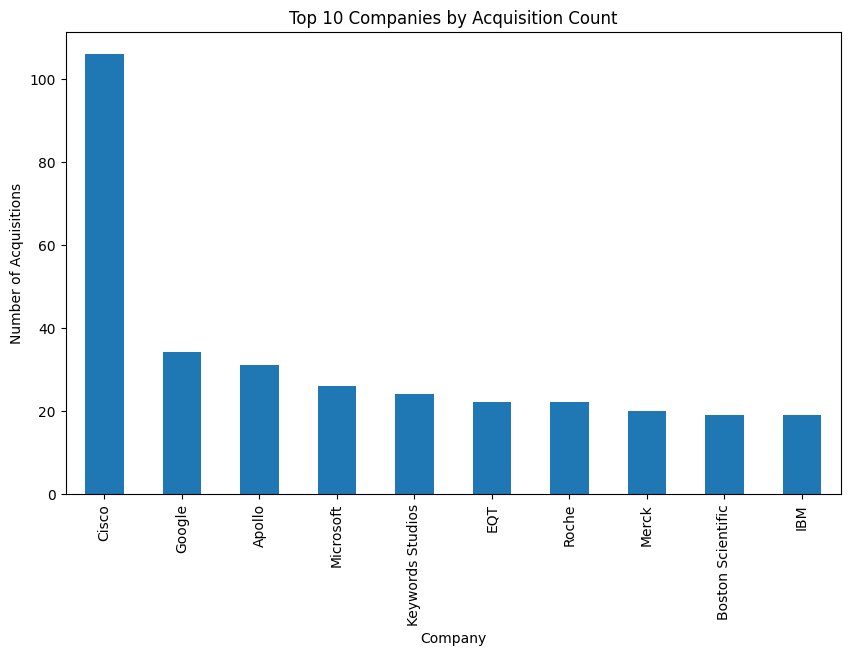

In [115]:
# Companies acquiring others most frequently
acquirer_count = acquisition_df['Company_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
acquirer_count.plot(kind='bar')
plt.title('Top 10 Companies by Acquisition Count')
plt.xlabel('Company')
plt.ylabel('Number of Acquisitions')
plt.show()

### Key Insights:

- **Cisco** emerges as the leading acquirer, significantly outpacing other companies in terms of the number of acquisitions. This suggests Cisco's aggressive strategy to maintain dominance, likely through acquiring smaller companies with innovative technologies to bolster its product offerings.
- **Google** and **Microsoft** are also prominent acquirers, highlighting their approach to growth via strategic acquisitions, which aligns with their expansion into new technology areas and bolstering existing capabilities.
- Companies like **Apollo** and **EQT** also feature among the top 10, indicating the presence of **private equity** players who are actively involved in acquiring businesses to either restructure them or enhance their investment portfolios.

These findings emphasize that acquisitions are not limited to technology but span across **financial services**, **pharmaceuticals**, and **media**. 


## Employee Dataset Overview

The **Employee Dataset** provides information on employees working across different companies, including their **job titles**, **associated companies**, and **educational backgrounds**. This dataset enables us to gain insights into the **profiles of key employees** and understand the **talent landscape** across various industries. Specifically, this dataset allows me to explore:

- **Job Roles and Titles**: By analyzing the **Job_Titles** column, we can identify the **most common roles** in various companies and understand which titles are most represented across industries.
- **Educational Background**: The **Attended_Schools** column provides insights into the educational qualifications of employees. This analysis can help us determine if certain educational institutions are commonly attended by employees of specific companies or in certain roles.
- **Company Employment Distribution**: The **Company_Name** column helps us see which companies employ the most individuals in the dataset, offering insights into the size of various company teams and the distribution of different job roles.

Key questions that we aim to answer include:

- **What are the most common job titles?** This can provide an overview of the types of roles that are most in demand.
- **Which companies employ the most people?** This can indicate which companies are experiencing growth and expanding their teams.
- **Top Companies with highest school attendis?** Understanding the schools attended by employees can provide insights into the educational paths that lead to employment in particular industries or companies.

The following sections will explore this data further, revealing valuable insights into the **job market**, **education**, and **company employment trends**.


In [44]:
employee_df

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
1,f9c87bcba2ffe2237e039b2e2c86b16f,Co-Founder,Twitter,Northeastern University University of Massach...
2,36830ffebad9a630da8a7a03a45f2730,Team Member,Twitter,NaN
3,84a91ad0f9b4149759f47fdc949fed42,General Counsel,Twitter,Cornell University New York University School...
4,7881769fc62f54c36a687bda02b66198,"VP, Trust & Safety",Twitter,NaN
...,...,...,...,...
20697,72c32150cb3f9b6e806fa530ed610175,Chairman and CEO,Iberdrola,NaN
20698,dd0ae519effadbef7559d299ad355f1f,Digital Channels Specialist Web Analyst,Iberdrola,EAE Business School
20699,aae97cfe2ea38ca0609a341e984b6b57,CEO,JD Logistics,NaN
20700,b8a8c88bce6444121ebce4ef8d41a204,Data Scientist,Keywords Studios,NaN


In [45]:
employee_df.rename(
    columns = {
        "EMPLOYEE_MD5": "Employee_Md5",
        "JOB_TITLES": "Job_Titles",
        "COMPANY_NAME": "Company_Name",
        "ATTENDED_SCHOOLS": "Attended_Schools"
    },
    inplace=True
)
employee_df.head()

,Employee_Md5,Job_Titles,Company_Name,Attended_Schools
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
1,f9c87bcba2ffe2237e039b2e2c86b16f,Co-Founder,Twitter,Northeastern University University of Massach...
2,36830ffebad9a630da8a7a03a45f2730,Team Member,Twitter,NaN
3,84a91ad0f9b4149759f47fdc949fed42,General Counsel,Twitter,Cornell University New York University School...
4,7881769fc62f54c36a687bda02b66198,"VP, Trust & Safety",Twitter,NaN


In [124]:
print(f"Shape of data: {employee_df.shape}")
employee_df.dropna(
    how="all",
    inplace=True
)
employee_df.dropna(
    subset = "Attended_Schools",
    how="all",
    inplace=True
)
print(f"Shape of data: {employee_df.shape}")
employee_df.drop_duplicates(inplace=True)

employee_df.reset_index(drop=True, inplace=True)
employee_df

Shape of data: (20702, 4)
Shape of data: (6584, 4)


,Employee_Md5,Job_Titles,Company_Name,Attended_Schools
0,f9c87bcba2ffe2237e039b2e2c86b16f,Co-Founder,Twitter,Northeastern University University of Massach...
1,84a91ad0f9b4149759f47fdc949fed42,General Counsel,Twitter,Cornell University New York University School...
2,3f8496f0151583244ca3ca296e341ee0,"Manager, Trust & Safety",Twitter,University of Pennsylvania
3,509d8b027e476a9cd7ed62b82372f01f,"Managing Director, Global Brand & Agency Strategy",Twitter,Kellogg School of Management Sorbonne Univers...
4,521ebd775ed38a1acf4fe31b26a454e5,Engineering Manager,Twitter,Northeastern University
...,...,...,...,...
6579,77c22d58ffd6fee49463b17c1ec987f6,"Partner Management & FourFronts, Europe",FreeWheel,Loughborough University
6580,6a641fe7e07e04f090cadffb80d7cfd1,"SVP, Revenue and Strategy",FreeWheel,NYU Stern School of Business
6581,35819f029053c8f0b72f3516604fac96,Manager,HMD,Bournemouth University
6582,13efc186592eba4ed93b0b61cc26330e,CFO,CAE,HEC Montréal


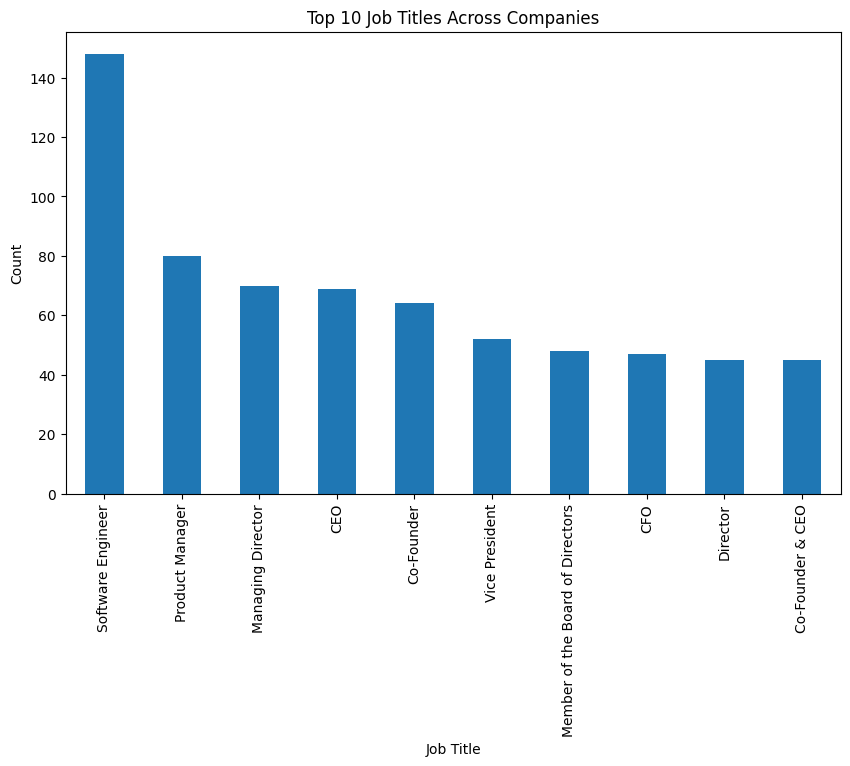

In [125]:
# Most common job titles
job_title_counts = employee_df['Job_Titles'].value_counts().head(10)

plt.figure(figsize=(10, 6))
job_title_counts.plot(kind='bar')
plt.title('Top 10 Job Titles Across Companies')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

### Key Insights from Employee Job Titles:

#### **Most Common Job Titles Across Companies**

- **Software Engineer** is by far the most common job title, with over 140 occurrences, indicating a high demand for engineering roles across the companies analyzed. This reflects the growing emphasis on technology and software development in the modern business landscape.
- Other prevalent roles include **Product Manager**, **Managing Director**, and **CEO**, showcasing a diverse mix of both technical and managerial expertise required by companies. The demand for leadership and management roles, such as **CEO**, **Vice President**, and **Managing Director**, signifies the importance of strategic leadership in company growth.
- Positions like **Member of the Board of Directors** and **CFO** (Chief Financial Officer) highlight the need for strong financial governance and strategic oversight within firms.

<function matplotlib.pyplot.show(close=None, block=None)>

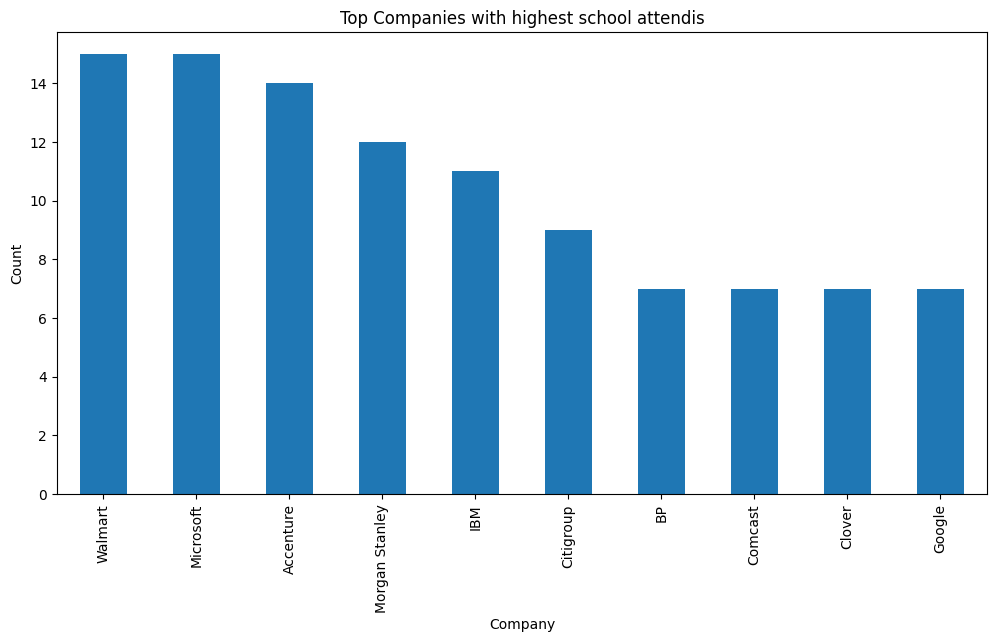

In [126]:
# Filter employees in leadership roles (e.g., titles containing "CEO", "Founder", "Executive")
leadership_roles = employee_df[employee_df['Job_Titles'].str.contains('CEO|Founder|Executive', case=False, na=False)]

# Count the most common degrees
School_Attendies = leadership_roles['Company_Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
School_Attendies.plot(kind='bar')
plt.title('Top Companies with highest school attendis')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show



### Key Insights from Educational Backgrounds:

#### **Educational Background of Leadership Roles**

- The bar chart highlighting the **top companies with the most educational background attendances** reveals interesting patterns in leadership education. **Walmart**, **Microsoft**, and **Accenture** emerge as companies with the highest number of employees who have notable educational qualifications.
- The prevalence of companies like **Morgan Stanley** and **IBM** indicates the importance of education in fields like finance, consulting, and technology. Employees of these companies appear to have attended a variety of top institutions, which reflects the kind of background often valued for leadership positions in these sectors.
- **BP** and **Google** also feature prominently, pointing to a strong emphasis on well-educated leaders, especially in **oil & energy** and **technology** sectors.

## Final Summary and Insights

The exploratory data analysis conducted provided a detailed view into the diverse aspects of companies, their employees, acquisitions, investments, and geographical distributions. The following are the key takeaways from the various analyses:

### **1. Company Age and Industry Trends**
- **Company Age Distribution**: The analysis revealed a varied distribution of company ages across different sectors, with older companies being more prominent in industries such as **Health Care**, **Finance**, and **Enterprise Software**. This indicates a mature presence in traditional sectors, while newer companies dominate fast-growing fields like **FinTech** and **SaaS**.
- **Investment Stages and Funding Trends**: Late-stage investments have increased significantly in recent years, highlighting an evolving startup ecosystem where companies are now maturing and seeking more substantial funding to expand. **Seed funding** and **early-stage investments** remain consistent, showing sustained investor interest in emerging ideas and innovations.

### **2. Employee Profiles and Educational Insights**
- **Job Roles in Demand**: **Software Engineers** are the most common job role across companies, reflecting the importance of technology in today's business world. The high presence of roles like **Product Managers** and **Managing Directors** indicates a balanced need for both **technical expertise** and **strategic management** to fuel growth.
- **Leadership and Educational Background**: An interesting pattern emerged from the analysis of leadership roles, showing that companies such as **Walmart**, **Microsoft**, and **Accenture** employ the most individuals with notable educational backgrounds. This highlights the critical role of education in filling leadership roles, particularly in major technology, finance, and consulting firms.

### **3. Acquisition and Market Consolidation**
- **Acquisition Activities**: **Cisco** leads by a significant margin in acquisition counts, indicating a highly active strategy to maintain market dominance by acquiring smaller, innovative companies. **Google** and **Microsoft** are also prominent acquirers, emphasizing their focus on expanding capabilities and securing market advantages.
- **Acquisition Trends by Sector**: Different acquisition patterns suggest that **tech giants** are focused on **expansion through innovation**, while **private equity firms** like **Apollo** are strategically acquiring companies to diversify their portfolios. This paints a picture of an industry where growth is largely driven by **mergers and acquisitions**, especially in competitive and technology-driven sectors.

### **4. Geographical and Market Influence**
- **Regional Industry Leadership**: The United States dominates most categories, especially in **Enterprise Software** and **E-Commerce**, highlighting its position as a global technology and business leader. India shows significant growth in **Internet** and **Enterprise Software**, suggesting an expanding tech industry. Meanwhile, the **United Kingdom** remains a major player in **Financial Services** and **Health Care**, further solidifying its status as a financial hub.
- **Global Opportunities**: Emerging categories like **FinTech** are less represented in certain regions, providing insights into potential markets that could be tapped into for growth and expansion.

### **5. Talent Distribution and School Attendees**
- Companies like **Walmart** and **Microsoft** have the highest counts of employees with notable educational backgrounds, emphasizing the emphasis on attracting well-qualified talent. This insight also sheds light on the kind of academic institutions that are producing future business leaders and influential figures across industries.

## **Conclusion**

The findings from this exploratory data analysis provide a comprehensive understanding of the startup and corporate landscape, highlighting key patterns across **funding trends**, **acquisition activities**, **talent distribution**, and **industry growth**.

- **For Investors**: The insights into funding trends and acquisition patterns provide valuable information for investors looking to identify potential opportunities in emerging markets or sectors with increasing activity.
- **For Entrepreneurs**: Understanding **the demand for specific job roles** and **funding preferences** can guide founders in positioning their companies better to secure investment and talent.
- **For Businesses**: Geographical analysis points towards **regions ripe for expansion** and where there may be **untapped opportunities** for growth.

Ultimately, this analysis paints a picture of a **dynamic ecosystem**, where **strategic investments**, **talent acquisition**, and **geographical focus** shape the direction of industries across the globe. Understanding these insights can be instrumental for stakeholders—from investors to entrepreneurs—looking to thrive in this competitive landscape.

### **Next Steps**

Future analyses could focus on deeper aspects such as:
- **Predictive Modeling**: Predict the next likely acquisitions or funding rounds based on current data trends.
- **Survival Analysis**: Analyze which types of companies are more likely to succeed or be acquired based on historical data.
- **Sentiment Analysis**: Leverage social media or news data to understand public perception and how it aligns with acquisition and funding trends.

These additional analyses could provide further insights, helping to support strategic decision-making for various stakeholders involved in the corporate and startup ecosystem.
